# Test the custom video dataset class

Using a small subset of the class

### Torch setup

In [1]:
import torch
from torch import nn

print("Using PyTorch version:", torch.__version__)

Using PyTorch version: 2.7.1+cu126


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


### Explore data

In [3]:
import os

data_path = "../data/"
split_path = data_path + "splits/asl100.json"
raw_path = data_path + "WLASL2000/"
print(f"split path exists: {os.path.exists(split_path)}\n")
print(f"raw videos path exists: {os.path.exists(raw_path)}\n")

split path exists: True

raw videos path exists: True



In [4]:
from video_dataset import VideoDataset
# prep_train, test and val have already been run
instances_path = './preprocessed_labels/asl100/train_instances.json'
classes_path = './preprocessed_labels/asl100/train_classes.json'
train_dataset = VideoDataset(raw_path, 'train', instances_path, classes_path)

print(f"Number of training samples: {len(train_dataset)}")


Number of training samples: 1442


Label: 0	book
Random frame index: 61
Frame shape: torch.Size([3, 240, 119])


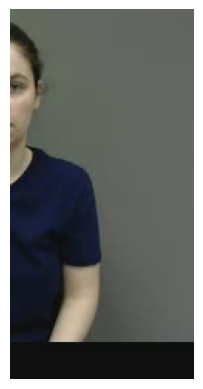

In [5]:
import cv2 
import random
import matplotlib.pyplot as plt

first_item = train_dataset[0]
frames = first_item['frames']
label_num = first_item['label_num']
classes_path = './wlasl_class_list.txt'
with open(classes_path, 'r') as f:
  class_list = f.read().splitlines()
print(f"Label: {class_list[label_num]}")
rand_num = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_num}")
frame = frames[rand_num]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()


Random frame index: 45
Frame shape: torch.Size([3, 240, 119])


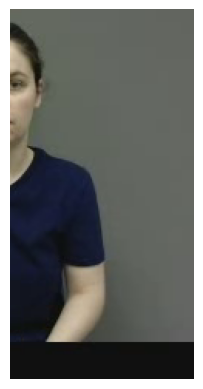

In [6]:
rand_num = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_num}")
frame = frames[rand_num]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()

### There seem to be some issues with cropping

Random video index: 329
Label: 18	all
Number of frames: 50
Random frame index: 19
Frame shape: torch.Size([3, 240, 119])


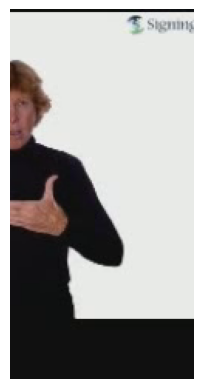

In [20]:
rand_vid = random.randint(0, len(train_dataset) - 1)
print(f"Random video index: {rand_vid}")
rand_item = train_dataset[rand_vid]
frames = rand_item['frames']
label_num = rand_item['label_num']
print(f"Label: {class_list[label_num]}")
print(f"Number of frames: {len(frames)}")
rand_frame = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_frame}")
frame = frames[rand_frame]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()

Random frame index: 43
Frame shape: torch.Size([3, 240, 119])


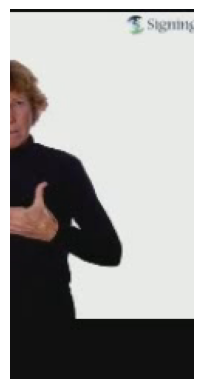

In [22]:
rand_frame = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_frame}")
frame = frames[rand_frame]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()

### Videos appear to be cropped about halfway too far to the right

# Second try

The bounding boxes seem to be the problem, as they are all the same

In [1]:
from video_dataset import VideoDataset
import random
import matplotlib.pyplot as plt
# prep_train, test and val have already been run
instances_path = './preprocessed_labels/asl100/train_instances.json'
classes_path = './preprocessed_labels/asl100/train_classes.json'
raw_path = '../data/WLASL2000/'
train_dataset = VideoDataset(raw_path, 'train', instances_path, classes_path)
with open(classes_path, 'r') as f:
  class_list = f.read().splitlines()
print(f"Number of training samples: {len(train_dataset)}")

Number of training samples: 1442


Random video index: 318
Label:     "book",
Number of frames: 46
Random frame index: 11
Frame shape: torch.Size([3, 256, 256])


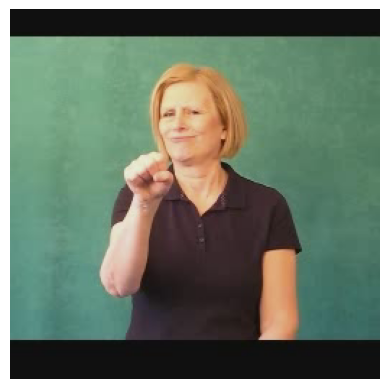

In [2]:

rand_vid = random.randint(0, len(train_dataset) - 1)
print(f"Random video index: {rand_vid}")
frames, label_num = train_dataset[rand_vid]

print(f"Label: {class_list[label_num]}")
print(f"Number of frames: {len(frames)}")
rand_frame = random.randint(0, len(frames) - 1)
print(f"Random frame index: {rand_frame}")
frame = frames[rand_frame]
print(f"Frame shape: {frame.shape}")
#convert to numpy array
np_frame = frame.permute(1, 2, 0).cpu().numpy()
plt.imshow(np_frame)
plt.axis('off')
plt.show()

Length distribution of video segments:
[63, 63, 46, 59, 95, 120, 92, 99, 79, 30, 86, 76, 94, 74, 57, 62, 72, 17, 27, 32, 32, 68, 89, 98, 78, 92, 103, 74, 81, 79, 45, 53, 88, 58, 64, 81, 57, 59, 60, 60, 54, 78, 47, 68, 44, 54, 54, 45, 104, 36, 47, 34, 41, 41, 50, 88, 71, 74, 101, 87, 66, 61, 75, 90, 68, 37, 37, 45, 38, 34, 54, 52, 54, 61, 39, 40, 95, 86, 57, 26, 64, 71, 76, 44, 31, 59, 46, 72, 91, 68, 41, 24, 40, 130, 50, 117, 46, 112, 79, 95, 78, 68, 31, 60, 19, 60, 101, 95, 97, 117, 99, 76, 64, 51, 38, 56, 38, 36, 71, 76, 76, 71, 49, 42, 91, 52, 53, 87, 54, 54, 51, 50, 61, 70, 77, 75, 87, 70, 54, 30, 57, 85, 79, 91, 117, 86, 97, 88, 77, 53, 53, 43, 83, 61, 64, 73, 31, 34, 78, 59, 131, 55, 60, 93, 40, 38, 55, 45, 86, 125, 62, 59, 74, 27, 73, 63, 49, 38, 60, 24, 64, 44, 66, 62, 101, 38, 67, 59, 60, 60, 111, 33, 28, 89, 50, 33, 63, 95, 69, 61, 91, 57, 107, 63, 83, 91, 32, 22, 32, 53, 54, 37, 33, 88, 100, 78, 77, 119, 59, 55, 63, 65, 67, 83, 54, 54, 32, 36, 47, 27, 56, 65, 60, 49, 57, 37,

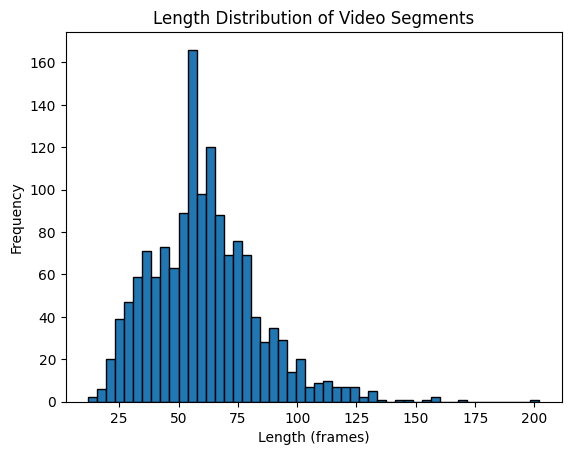

In [3]:
import json
def length_distribution(instances_path):
  with open(instances_path, 'r') as f:
    instances = json.load(f)
  lengths = [item['frame_end'] - item['frame_start'] for item in instances]
  print("Length distribution of video segments:")
  print(lengths)
  return lengths

lengths = length_distribution('./preprocessed_labels/asl100/train_instances.json')
#plot as histogram

plt.hist(lengths, bins=50, edgecolor='black')
plt.title('Length Distribution of Video Segments')
plt.xlabel('Length (frames)')
plt.ylabel('Frequency')
plt.show()

In [5]:
#collect outliers to output
with open(instances_path, 'r') as f:
  instances = json.load(f)
outliers = []

output = './output/outliers.txt'
for item in instances:
  length = item['frame_end'] - item['frame_start']
  if length > 125 or length < 25:
    outliers.append(item)
with open(output, 'w') as f:
  for outlier in outliers:
    f.write(f"{outlier}\n")
    
     
  

In [6]:
print(f"Outliers: \n{[outliers['video_id'] for outliers in outliers]}")

Outliers: 
['07071', '05742', '70230', '09853', '63232', '08924', '14885', '27211', '70306', '68992', '64219', '64283', '06477', '13200', '56573', '56576', '56577', '57632', '05631', '68350', '68070', '31762', '32146', '32162', '34738', '34742', '55361', '63207', '70132', '64090', '00618', '00633', '06334', '13330', '13331', '22956', '22959', '24651', '35514', '35515', '50044', '51229', '58503', '62249', '62250', '70357', '10892', '28210']


In [9]:
from video_dataset import load_rgb_frames_from_video
import os
import torch
def pad_frames(frames, target_length):
  num_frames = frames.shape[0]
  if num_frames == target_length:
    return frames
  elif num_frames < target_length:
    # Pad with zeros if the number of frames is less than the target length
    padding = torch.zeros(target_length - num_frames, frames.shape[1], frames.shape[2], frames.shape[3], device=frames.device)
    return torch.cat((frames, padding), dim=0)
  else:
    # Trim the frames if the number of frames is greater than the target length
    return frames[:target_length, :, :, :]  
#pick random outlier
rand_outlier = random.choice(outliers)
print(f"Random outlier: {rand_outlier}")
#load frames from video
path = os.path.join(raw_path, rand_outlier['video_id'] + '.mp4')
frames = load_rgb_frames_from_video(path,
                                    rand_outlier['frame_start'],
                                    rand_outlier['frame_end'])
print(f"Number of frames: {len(frames)}")
#pad frames to 125
padded_frames = pad_frames(frames, 125)
print(f"Number of padded frames: {len(padded_frames)}")


Random outlier: {'label_num': 28, 'frame_end': 169, 'frame_start': 1, 'video_id': '56576'}
Number of frames: 168
Number of padded frames: 125


### Great, seems to be working

In [1]:
from torch.utils.data import DataLoader
import video_dataset
raw_path = '../data/WLASL2000/'
instances_path = './preprocessed_labels/asl100/train_instances.json'
classes_path = './preprocessed_labels/asl100/train_classes.json'
padded_length = 125
transform = lambda x: video_dataset.pad_frames(x, padded_length)
train_dataset = video_dataset.VideoDataset(raw_path, 'train', instances_path,
                                           classes_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True,num_workers=1)
train_loader


### Getting an item

In [12]:
from video_dataset import load_rgb_frames_from_video
import json
with open(instances_path, 'r') as f:
  instances = json.load(f)
first = instances[0]
path = os.path.join(raw_path, first['video_id'] + '.mp4')
frames = load_rgb_frames_from_video(path, start=first['frame_start'], end=first['frame_end'])

In [2]:
frames, label = next(iter(train_loader))



In [3]:
print(f"Frames shape: {frames.shape}")
print(f"Label shape: {label.shape}")
class_list_path = './wlasl_class_list.txt'
with open(class_list_path, 'r') as f:
  class_list = f.read().splitlines()
print(f"Label: {class_list[label.item()]}")


Frames shape: torch.Size([1, 125, 3, 256, 256])
Label shape: torch.Size([1])
Label: 57	cow


In [5]:
from video_dataset import load_rgb_frames_from_video
import json
import random
import os
instances_path = './preprocessed_labels/asl100/train_instances.json'
raw_path = '../data/WLASL2000/'
with open(instances_path, 'r') as f:
  instances = json.load(f)
rand_instance = random.choice(instances)
video_id = rand_instance['video_id']
frame_start = rand_instance['frame_start']
frame_end = rand_instance['frame_end']
path = os.path.join(raw_path, video_id + '.mp4')
frames = load_rgb_frames_from_video(path, frame_start, frame_end)
print(f"Shape of frames: {frames.shape}")

Shape of frames: torch.Size([102, 3, 256, 256])


In [7]:
import torchvision.models.video as video_models
import torch

# Load an R3D-18 model (ResNet with 3D convolutions throughout)
# pretrained=True will download weights trained on the Kinetics dataset
model = video_models.r3d_18(pretrained=True)
model.eval()
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

print(f"Loaded model: {model.__class__.__name__} on {device}")  # Convert to CxTxHxW format

/home/luke/ExtraStorage/WLASL/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/luke/ExtraStorage/WLASL/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=R3D_18_Weights.KINETICS400_V1`. You can also use `weights=R3D_18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loaded model: VideoResNet on cuda


In [12]:
import torch.nn.functional as F
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize

# Example: Create a dummy video tensor (replace with your actual video loading)
# This represents a batch of 1 video, 3 channels, 16 frames, 112x112 resolution
# dummy_video = torch.randn(1, 3, 16, 112, 112)

#for interpolation: (T, C, H, W)
x = F.interpolate(frames.float(), size=(112, 112), mode='bilinear', align_corners=False)
norm = Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.221459, 0.216321])

dummy_video = norm(x)
dummy_video = dummy_video.permute(1, 0, 2, 3)  # Convert to C, T, H, W format
dummy_video = dummy_video.unsqueeze(0)  # Add batch dimension (B, C, T, H, W)


# Define transformations for a typical video input
# transform = Compose([
#     #ToTensor(), should already be a Tensor in C, T, H, W format
#     # Resize((112, 112)), # Resize frames
    
#     Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.221459, 0.216321]) # Kinetics-400 mean/std
# ])

#Apply transform to the dummy video
# dummy_video = transform(dummy_video)
inputs = dummy_video.to(device)
print(f"Input tensor shape for torchvision model: {inputs.shape}")

Input tensor shape for torchvision model: torch.Size([1, 3, 59, 112, 112])


In [13]:
with torch.no_grad():
    outputs = model(inputs)

# For classification, apply softmax to get probabilities
probabilities = F.softmax(outputs, dim=1)
print(f"Output probabilities shape: {probabilities.shape}")
print(f"First 5 probabilities: {probabilities[0, :5]}")

Output probabilities shape: torch.Size([1, 400])
First 5 probabilities: tensor([0., 0., 0., 0., 0.], device='cuda:0')


## Making a histogram of the widths and heights of the frames

Frames shape: torch.Size([1, 125, 3, 256, 256])
Label shape: torch.Size([1])

Processing batches:   3%|▎         | 38/1442 [00:10<06:20,  3.69it/s]

Invalid frame range: start=830, end=933, num_frames=104. Adjusting to valid range.
Using start=0 and end=104


Processing batches:   7%|▋         | 99/1442 [00:27<06:00,  3.73it/s]

Invalid frame range: start=4359, end=4470, num_frames=112. Adjusting to valid range.
Using start=0 and end=112


Processing batches:   8%|▊         | 118/1442 [00:32<05:49,  3.78it/s]

Invalid frame range: start=6741, end=6836, num_frames=96. Adjusting to valid range.
Using start=0 and end=96


Processing batches:  10%|▉         | 143/1442 [00:39<06:01,  3.59it/s]

Invalid frame range: start=860, end=989, num_frames=130. Adjusting to valid range.
Using start=0 and end=130


Processing batches:  10%|█         | 149/1442 [00:41<06:00,  3.59it/s]

Invalid frame range: start=1749, end=1869, num_frames=121. Adjusting to valid range.
Using start=0 and end=121


Processing batches:  16%|█▌        | 234/1442 [01:04<05:20,  3.76it/s]

Invalid frame range: start=5233, end=5344, num_frames=112. Adjusting to valid range.
Using start=0 and end=112


Processing batches:  18%|█▊        | 264/1442 [01:13<05:40,  3.46it/s]

Invalid frame range: start=1068, end=1179, num_frames=112. Adjusting to valid range.
Using start=0 and end=112


Processing batches:  19%|█▉        | 276/1442 [01:16<05:29,  3.54it/s]

Invalid frame range: start=6881, end=7016, num_frames=136. Adjusting to valid range.
Using start=0 and end=136


Processing batches:  24%|██▍       | 353/1442 [01:38<05:09,  3.52it/s]

Invalid frame range: start=7250, end=7361, num_frames=112. Adjusting to valid range.
Using start=0 and end=112


Processing batches:  25%|██▍       | 359/1442 [01:39<05:09,  3.50it/s]

Invalid frame range: start=7390, end=7475, num_frames=86. Adjusting to valid range.
Using start=0 and end=86


Processing batches:  33%|███▎      | 482/1442 [02:13<04:28,  3.57it/s]

Invalid frame range: start=3092, end=3209, num_frames=118. Adjusting to valid range.
Using start=0 and end=118


Processing batches:  35%|███▍      | 503/1442 [02:19<04:13,  3.70it/s]

Invalid frame range: start=1429, end=1537, num_frames=109. Adjusting to valid range.
Using start=0 and end=109


Processing batches:  38%|███▊      | 542/1442 [02:30<04:09,  3.61it/s]

Invalid frame range: start=869, end=964, num_frames=96. Adjusting to valid range.

Processing batches:  38%|███▊      | 543/1442 [02:30<04:14,  3.54it/s]


Using start=0 and end=96


Processing batches:  39%|███▉      | 566/1442 [02:37<04:00,  3.64it/s]

Invalid frame range: start=5286, end=5411, num_frames=126. Adjusting to valid range.
Using start=0 and end=126


Processing batches:  45%|████▌     | 651/1442 [03:00<03:35,  3.67it/s]

Invalid frame range: start=1285, end=1384, num_frames=100. Adjusting to valid range.
Using start=0 and end=100


Processing batches:  48%|████▊     | 695/1442 [03:12<03:28,  3.58it/s]

Invalid frame range: start=1858, end=1971, num_frames=114. Adjusting to valid range.
Using start=0 and end=114


Processing batches:  50%|█████     | 727/1442 [03:21<03:12,  3.72it/s]

Invalid frame range: start=1146, end=1241, num_frames=96. Adjusting to valid range.


Processing batches:  50%|█████     | 728/1442 [03:21<03:16,  3.63it/s]

Using start=0 and end=96


Processing batches:  54%|█████▎    | 774/1442 [03:34<03:09,  3.52it/s]

Invalid frame range: start=1682, end=1790, num_frames=109. Adjusting to valid range.
Using start=0 and end=109


Processing batches:  58%|█████▊    | 836/1442 [03:52<02:53,  3.49it/s]

Invalid frame range: start=4420, end=4511, num_frames=92. Adjusting to valid range.
Using start=0 and end=92


Processing batches:  64%|██████▎   | 919/1442 [04:15<02:21,  3.70it/s]

Invalid frame range: start=2006, end=2106, num_frames=101. Adjusting to valid range.
Using start=0 and end=101


Processing batches:  67%|██████▋   | 961/1442 [04:26<02:15,  3.54it/s]

Invalid frame range: start=2101, end=2231, num_frames=131. Adjusting to valid range.
Using start=0 and end=131


Processing batches:  68%|██████▊   | 978/1442 [04:31<02:07,  3.63it/s]

Invalid frame range: start=7902, end=8018, num_frames=117. Adjusting to valid range.
Using start=0 and end=117


Processing batches:  68%|██████▊   | 979/1442 [04:31<02:07,  3.64it/s]

Invalid frame range: start=4221, end=4314, num_frames=94. Adjusting to valid range.
Using start=0 and end=94


Processing batches:  74%|███████▍  | 1070/1442 [04:56<01:42,  3.61it/s]

Invalid frame range: start=6591, end=6697, num_frames=107. Adjusting to valid range.
Using start=0 and end=107


Processing batches:  77%|███████▋  | 1105/1442 [05:06<01:37,  3.47it/s]

Invalid frame range: start=3732, end=3852, num_frames=121. Adjusting to valid range.
Using start=0 and end=121


Processing batches:  78%|███████▊  | 1122/1442 [05:11<01:28,  3.60it/s]

Invalid frame range: start=80, end=137, num_frames=58. Adjusting to valid range.
Using start=0 and end=58


Processing batches:  78%|███████▊  | 1125/1442 [05:12<01:24,  3.73it/s]

Invalid frame range: start=4255, end=4351, num_frames=97. Adjusting to valid range.

Processing batches:  78%|███████▊  | 1126/1442 [05:12<01:26,  3.65it/s]


Using start=0 and end=97


Processing batches:  84%|████████▍ | 1208/1442 [05:35<01:03,  3.66it/s]

Invalid frame range: start=1683, end=1814, num_frames=132. Adjusting to valid range.
Using start=0 and end=132


Processing batches:  87%|████████▋ | 1251/1442 [05:47<00:52,  3.61it/s]

Invalid frame range: start=4000, end=4107, num_frames=108. Adjusting to valid range.
Using start=0 and end=108


Processing batches:  87%|████████▋ | 1261/1442 [05:49<00:49,  3.65it/s]

Invalid frame range: start=4778, end=4873, num_frames=96. Adjusting to valid range.
Using start=0 and end=96


Processing batches:  90%|████████▉ | 1297/1442 [05:59<00:39,  3.70it/s]

Invalid frame range: start=1161, end=1262, num_frames=102. Adjusting to valid range.
Using start=0 and end=102


Processing batches:  92%|█████████▏| 1322/1442 [06:06<00:33,  3.63it/s]

Invalid frame range: start=7225, end=7324, num_frames=100. Adjusting to valid range.
Using start=0 and end=100


Processing batches:  92%|█████████▏| 1324/1442 [06:07<00:32,  3.61it/s]

Invalid frame range: start=5546, end=5667, num_frames=122. Adjusting to valid range.
Using start=0 and end=122


Processing batches:  97%|█████████▋| 1402/1442 [06:29<00:10,  3.66it/s]

Invalid frame range: start=1581, end=1681, num_frames=101. Adjusting to valid range.


Processing batches:  97%|█████████▋| 1403/1442 [06:29<00:10,  3.70it/s]

Using start=0 and end=101


Processing batches: 100%|██████████| 1442/1442 [06:40<00:00,  3.60it/s]


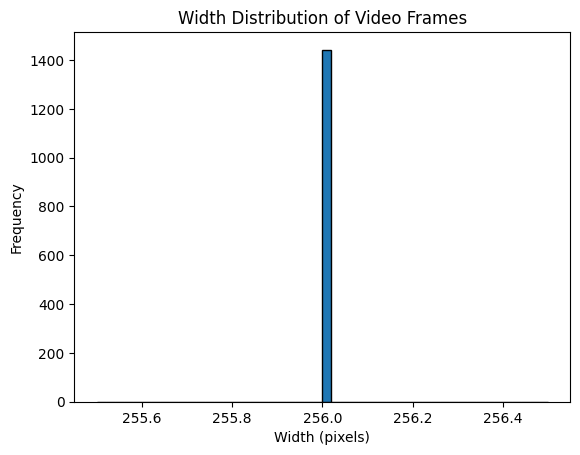

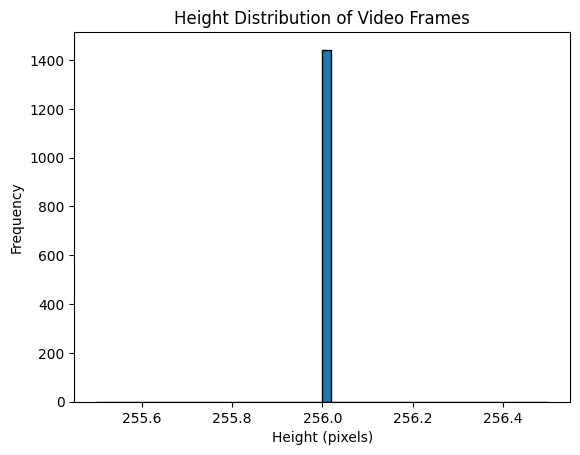

In [1]:
from video_dataset import VideoDataset, pad_frames
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np 
from tqdm import tqdm

raw_path = '../data/WLASL2000/'
instances_path = './preprocessed_labels/asl100/train_instances.json'
classes_path = './preprocessed_labels/asl100/train_classes.json'
padded_length = 125
transform = lambda x: pad_frames(x, padded_length)
train_dataset = VideoDataset(raw_path, 'train', instances_path,
                                           classes_path, transform=transform)
temp_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=1)
widths = []
heights = []
for batch in tqdm(temp_loader, desc="Processing batches"):
    frames, label = batch
    heights.append(frames.shape[3])
    widths.append(frames.shape[4])
plt.hist(widths, bins=50, edgecolor='black')
plt.title('Width Distribution of Video Frames')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.show()
plt.hist(heights, bins=50, edgecolor='black')
plt.title('Height Distribution of Video Frames')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.show()

    
